In [1]:
import sys
sys.path.insert(0, './../')
from preprocessing import TraceStats, BatchStats
from estimators import GT, AE, GEE, UJ2A, SGD, PA
from visualization import df_to_pdf
from scipy.stats import linregress
import pandas as pd
import pylatex as pl

datapath = './../data/'

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

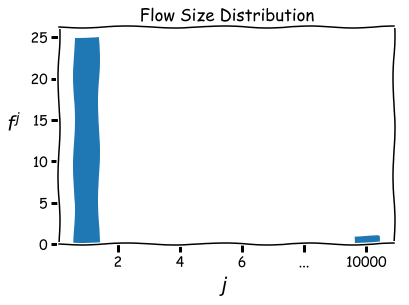

In [31]:
# Heavy-Tailed Graph

with plt.xkcd():
    plt.title("Flow Size Distribution")
    plt.ylabel("$f^j$     ", fontsize=20, rotation='horizontal')
    plt.xlabel("$j$", fontsize=20)
    # plt.annotate(
    # 'LOST IN THE SAMPLING\nPROCESS',
    # xy=(1, 10), arrowprops=dict(arrowstyle='->'), xytext=(3, 20))
    plt.xticks([2,4,6,8,10], ['2','4','6','...','10000'])
    plt.bar([1, 10], [25, 1])

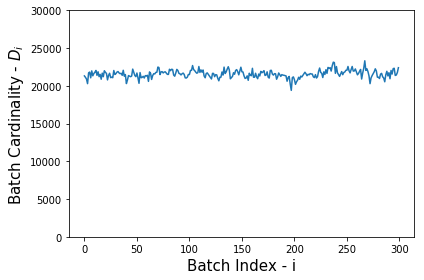

In [37]:
trace = 'caida-2016'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)
df = ts.to_df()


df.batch_card.plot()
plt.ylim((0,30000))
plt.xlabel('Batch Index - i', fontsize=15)
plt.ylabel('Batch Cardinality - $D_i$', fontsize=15)
plt.tight_layout()

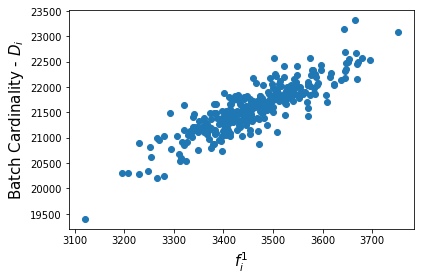

In [39]:
trace = 'caida-2016'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)
df = ts.to_df()


plt.scatter(df.f_1, df.batch_card)
plt.xlabel('$f_i^1$', fontsize=15)
plt.ylabel('Batch Cardinality - $D_i$', fontsize=15)
plt.tight_layout()

In [30]:
trace = 'caida-2016'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)
df = ts.to_df()

slope, intercept, pearson, _ , _= linregress(df.f_1, df.batch_card)
print(slope, intercept, pearson)

4.516524345965422 5955.363218143828 0.8733252815930512


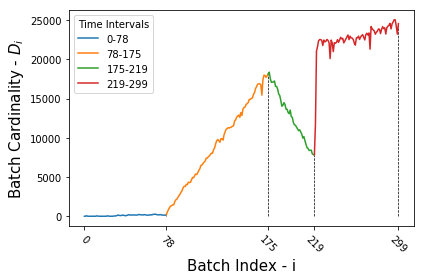

In [41]:
trace = 'caida-ddos'
sampling_rate = 0.1009
partition = '1S'

ts = TraceStats.load(datapath  + trace + '_' + partition +'_%.4f.pickle' % sampling_rate)

df = ts.to_df()

intervals = [0,78,175,219,299]

for i in range(len(intervals)-1):
    temp = df.iloc[intervals[i]:intervals[i+1]+1]
    temp.batch_card.plot(label='%d-%d' % (intervals[i],intervals[i+1]))
for i in range(len(intervals)):
    plt.vlines(x=intervals[i], ymin= 0, ymax=df.iloc[intervals[i]].batch_card, color='k', linestyle='--', lw=0.7)
plt.legend(loc=2, title='Time Intervals')
plt.xticks(intervals, rotation=-45)
plt.xlabel('Batch Index - i', fontsize=15)
plt.ylabel('Batch Cardinality - $D_i$', fontsize=15)
plt.tight_layout()

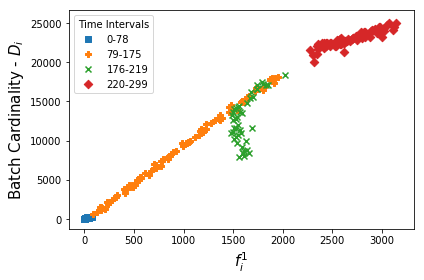

In [44]:
trace = 'caida-ddos'
sampling_rate = 0.1009
partition = '1S'

ts = TraceStats.load(datapath  + trace + '_' + partition +'_%.4f.pickle' % sampling_rate)

del(ts.batch_list[219])
ts.batch_count-=1

df = ts.to_df()

intervals = [(0,78),(79,175),(176,219),(220,299)]
markers = ['s', 'P', 'x', 'D', '^', 'o']
for i in range(len(intervals)):
    temp = df.iloc[intervals[i][0]:intervals[i][1]+1]
    plt.scatter(temp.f_1, temp.batch_card, label='%d-%d' % (intervals[i][0],intervals[i][1]), marker=markers[i])
plt.legend(title='Time Intervals')
plt.xlabel('$f_i^1$', fontsize=15)
plt.ylabel('Batch Cardinality - $D_i$', fontsize=15)
plt.tight_layout()

In [46]:
trace = 'caida-ddos'
sampling_rate = 0.1009
partition = '1S'

ts = TraceStats.load(datapath  + trace + '_' + partition +'_%.4f.pickle' % sampling_rate)

df = ts.to_df()


intervals = [(0,78),(79,175),(176,219),(220,299)]

features = ['f_1']
rows = []

for i in range(len(intervals)):
    temp = df.iloc[intervals[i][0]:intervals[i][1]+1]
    for feature in features:
        slope, intercept, pearson, _ , _= linregress(temp[feature], temp.batch_card)
        rows.append((trace, sampling_rate, intervals[i], feature, slope, intercept, pearson))
        
df = pd.DataFrame.from_records(rows, columns = ['trace', 'sampling_rate', 'Interval', 'feature',
                                                'Slope', 'Intercept', 'Pearson Coefficient'] )

df = df[(df['sampling_rate'] == sampling_rate) & (df['trace'] == trace) &(df['feature'] == 'f_1')]
df = df[['Interval', 'Slope', 'Intercept', 'Pearson Coefficient']]
df_to_pdf(df, 'pearson_caida_seminar', print_index=False, digit_round=2)
df

,Interval,Slope,Intercept,Pearson Coefficient
0,"(0, 78)",3.733659,20.558481,0.965073
1,"(79, 175)",9.573710,-215.702221,0.998753
2,"(176, 219)",16.291667,-13681.949638,0.602003
3,"(220, 299)",5.322016,8658.569962,0.841170


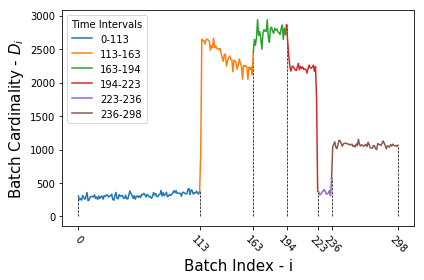

In [40]:
trace = 'darpa-ddos'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)

del(ts.batch_list[219])
ts.batch_count-=1

df = ts.to_df()

intervals = [0,113,163,194,223,236,298]

for i in range(len(intervals)-1):
    temp = df.iloc[intervals[i]:intervals[i+1]+1]
    temp.batch_card.plot(label='%d-%d' % (intervals[i],intervals[i+1]))
for i in range(len(intervals)):
    plt.vlines(x=intervals[i], ymin= 0, ymax=df.iloc[intervals[i]].batch_card, color='k', linestyle='--', lw=0.7)
plt.legend(loc=2, title='Time Intervals')
plt.xticks(intervals, rotation=-45)
plt.xlabel('Batch Index - i', fontsize=15)
plt.ylabel('Batch Cardinality - $D_i$', fontsize=15)
plt.tight_layout()

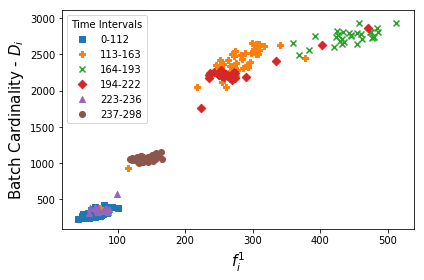

In [42]:
trace = 'darpa-ddos'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)

del(ts.batch_list[219])
ts.batch_count-=1

df = ts.to_df()

intervals = [(0,112),(113,163),(164,193),(194,222),(223,236),(237,298)]
markers = ['s', 'P', 'x', 'D', '^', 'o']
for i in range(len(intervals)):
    temp = df.iloc[intervals[i][0]:intervals[i][1]+1]
    plt.scatter(temp.f_1, temp.batch_card, label='%d-%d' % (intervals[i][0],intervals[i][1]), marker=markers[i])
plt.legend(title='Time Intervals')
plt.xlabel('$f_i^1$', fontsize=15)
plt.ylabel('Batch Cardinality - $D_i$', fontsize=15)
plt.tight_layout()

In [33]:
trace = 'darpa-ddos'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)

del(ts.batch_list[219])
ts.batch_count-=1

df = ts.to_df()

intervals = [(0,112),(113,163),(164,193),(194,222),(223,236),(237,298)]

features = ['f_1']
rows = []

for i in range(len(intervals)):
    temp = df.iloc[intervals[i][0]:intervals[i][1]+1]
    for feature in features:
        slope, intercept, pearson, _ , _= linregress(temp[feature], temp.batch_card)
        rows.append((trace, sampling_rate, intervals[i], feature, slope, intercept, pearson))
        
df = pd.DataFrame.from_records(rows, columns = ['trace', 'sampling_rate', 'Interval', 'feature',
                                                'Slope', 'Intercept', 'Pearson Coefficient'] )

df = df[(df['sampling_rate'] == 0.1) & (df['trace'] == trace) &(df['feature'] == 'f_1')]
df = df[['Interval', 'Slope', 'Intercept', 'Pearson Coefficient']]
df_to_pdf(df, 'pearson_darpa_seminar', print_index=False, digit_round=2)
df

,Interval,Slope,Intercept,Pearson Coefficient
0,"(0, 112)",2.487790,144.172844,0.680921
1,"(113, 163)",7.567945,261.500211,0.905755
2,"(164, 193)",1.843295,1928.538753,0.665554
3,"(194, 222)",2.983719,1431.398385,0.870568
4,"(223, 236)",2.991998,149.881885,0.540075
5,"(237, 298)",1.205162,895.084995,0.431736


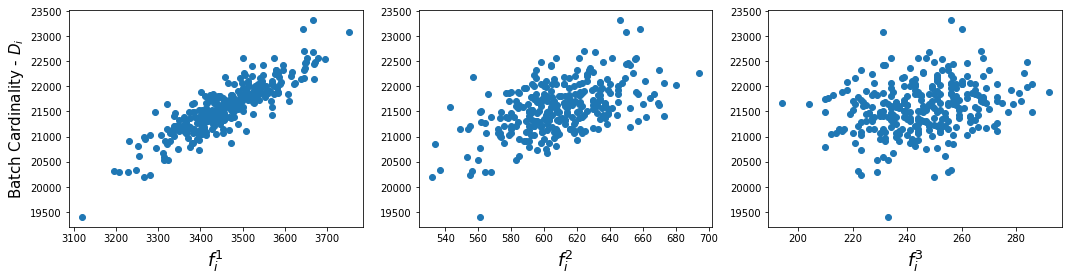

In [49]:
trace = 'caida-2016'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)
df = ts.to_df()

f, (ax1,ax2,ax3)  = plt.subplots(1,3, figsize = (15,4))

ax1.scatter(df['f_1'], df['batch_card'])
ax1.set_xlabel('$f_i^1$', fontsize=18)
ax1.set_ylabel('Batch Cardinality - $D_i$', fontsize=15)

ax2.scatter(df['f_2'], df['batch_card'])
ax2.set_xlabel('$f_i^2$', fontsize=18)

ax3.scatter(df['f_3'], df['batch_card'])
ax3.set_xlabel('$f_i^3$', fontsize=18)


plt.tight_layout()

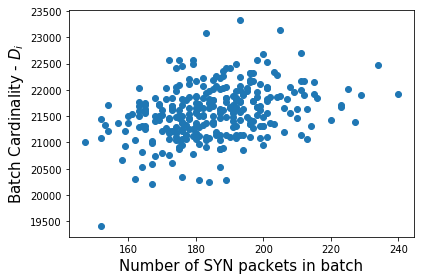

In [51]:
trace = 'caida-2016'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)
df = ts.to_df()

plt.scatter(df.syn_count, df.batch_card)
plt.xlabel('Number of SYN packets in batch', fontsize=15)
plt.ylabel('Batch Cardinality - $D_i$', fontsize=15)
plt.tight_layout()

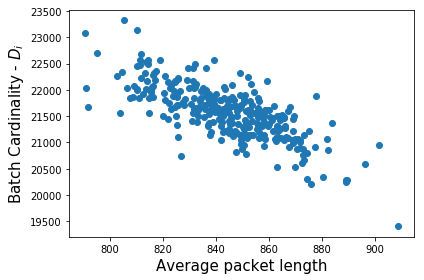

In [52]:
trace = 'caida-2016'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)
df = ts.to_df()

plt.scatter(df.avg_pkt_len, df.batch_card)
plt.xlabel('Average packet length', fontsize=15)
plt.ylabel('Batch Cardinality - $D_i$', fontsize=15)
plt.tight_layout()